###Capital Bike Sharing


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Load the dataset
df_hr = pd.read_csv('CBS_Hourly.csv',low_memory=False)
df_day = pd.read_csv('CBS_Daily.csv',low_memory=False)
# df_full = pd.read_csv('CBS_Full.csv',low_memory=False)

# df_hr.head(50) 

# df_hr.info()    
# df_day.info()
# df_hr.describe()
# df_day.describe()
# df_hr.tail(50) 
df_hr.duplicated().sum()



df_hr = df_hr.rename(columns={'relativehumidity_2m (%)': 're_humidity', 'temperature_2m (°C)':'tempt_2m','weathercode (wmo code)':'wmo_code','windspeed_10m (km/h)':'wind_speed'})
df_hr


,Casual,Date,Hour,Member,Total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


In [ ]:
#data cleaning for df_hr
df_hr 
df_hr.isnull().sum()
df_hr_n = df_hr.dropna(subset=['Casual', 'Member', 'Total_rides']) 
df_hr_n.isnull().sum() 
df_hr_n.isnull() 

# df_hr_n['Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce') 
df_hr_n.loc[:, 'Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce')
# df_hr_n.isnull().sum()  


Casual         0
Date           0
Hour           0
Member         0
Total_rides    0
re_humidity    0
tempt_2m       0
wmo_code       0
wind_speed     0
dtype: int64

In [50]:
#data cleaning for df_day
# print(df_day)
df_day.isnull().sum()

df_day.duplicated().sum()
df_day_n = df_day.rename(columns={'apparent_temperature_mean (°C)':'apt_tempt_mean','temperature_2m_mean (°C)': 'tempt_2m_mean','weathercode (wmo code)':'wmo_code','windspeed_10m_max (km/h)':'wind_speed' })
df_day_n.loc[:, 'Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce')
df_day_n.isnull().sum() 
df_day_n


,Casual,Date,Member,Total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01 00:00:00,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-01 00:00:00,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-01 00:00:00,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-01 00:00:00,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-01 00:00:00,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2021-02-15 00:00:00,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2021-02-15 00:00:00,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2021-02-15 00:00:00,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2021-02-15 00:00:00,4497,7594,-7.3,-2.9,1,13.8


In [ ]:
print('Hourley data:\n',df_hr_n)
# print('Day Dataset:\n',df_day_n)


Hourley data:
        Casual                 Date  Hour  Member  Total_rides  re_humidity  \
0        20.0  2021-01-01 00:00:00     0    26.0         46.0           90   
1        23.0  2021-01-01 00:00:00     1    23.0         46.0           88   
2        20.0  2021-01-01 00:00:00     2    28.0         48.0           87   
3         9.0  2021-01-01 00:00:00     3     7.0         16.0           81   
4         7.0  2021-01-01 00:00:00     4     5.0         12.0           77   
...       ...                  ...   ...     ...          ...          ...   
26275   132.0  2023-12-31 00:00:00    19   190.0        322.0           71   
26276   125.0  2023-12-31 00:00:00    20   194.0        319.0           79   
26277    84.0  2023-12-31 00:00:00    21   137.0        221.0           80   
26278    83.0  2023-12-31 00:00:00    22   142.0        225.0           80   
26279    82.0  2023-12-31 00:00:00    23   106.0        188.0           73   

       tempt_2m  wmo_code  wind_speed  
0       

In [ ]:
#data visualization for df_hr using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')        
plt.title('Total Rides by Weather Code')

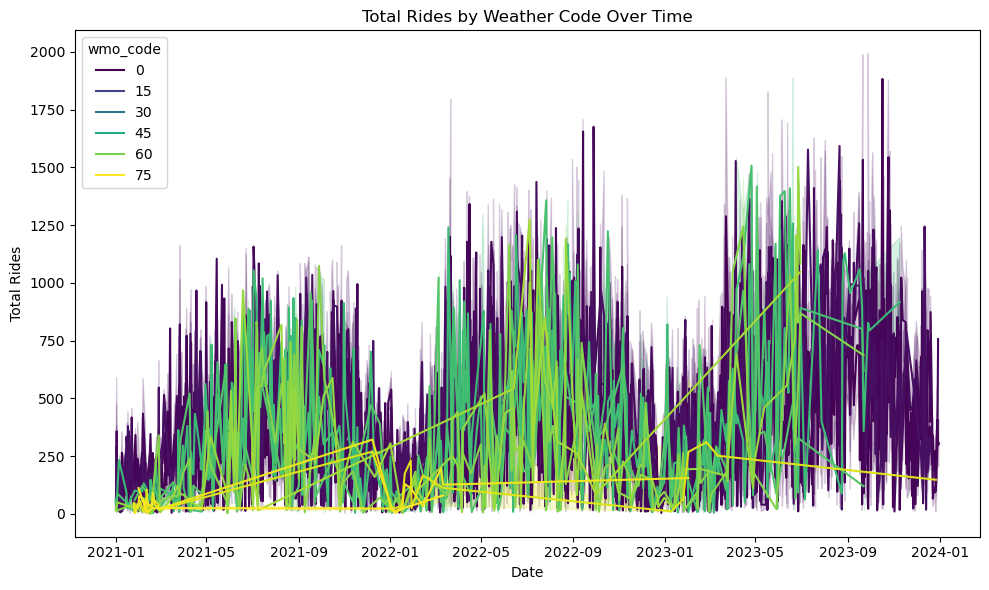

In [61]:
#data visualization for df_hr
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_hr_n, x='Date', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rides')   
# plt.xticks(rotation=45)
# plt.legend(title='Weather Code')
plt.tight_layout()
plt.show()  

In [ ]:
#scatter plot for df_hr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hr_n, x='Date', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rides')   
plt.xticks(rotation=45)
plt.legend(title='Weather Code')
plt.tight_layout()
plt.show()  

Text(0.5, 1.0, 'Total Rides by Weather Code')

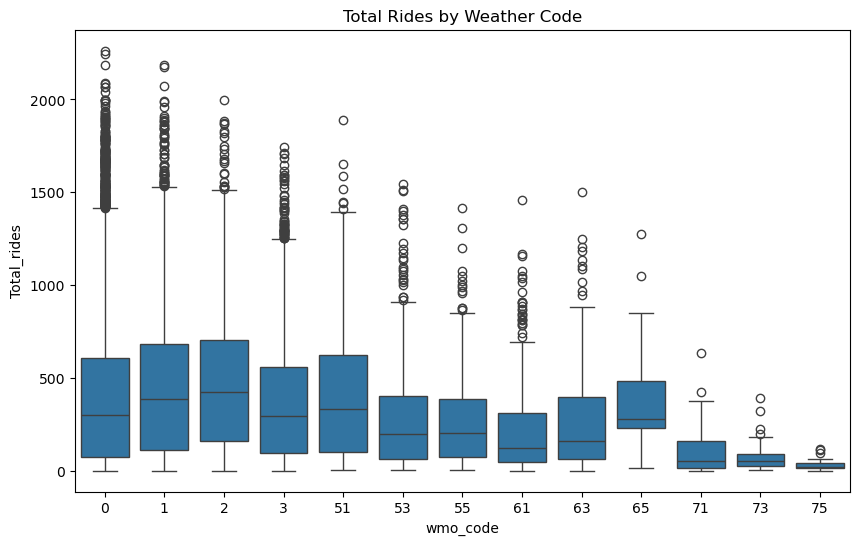

In [ ]:
#data visualization 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')        
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  
# df = pd.read_csv("/Users/ms/Desktop/CAB/Datasets/BikeShare/Datasets/CBS_2021_2023/CBS_2021-2023_Full.csv")

In [ ]:

# # Minimize memory usage 
# df = pd.read_csv("CBS_full.csv")  
# def minimize_memory_usage(df):
#     for col in df.columns:
#         if df[col].dtype == 'object':
#             df[col] = df[col].astype('category')
#         elif df[col].dtype == 'int64':
#             if df[col].min() >= 0:
#                 df[col] = pd.to_numeric(df[col], downcast='unsigned')
#             else:
#                 df[col] = pd.to_numeric(df[col], downcast='integer')
#         elif df[col].dtype == 'float64':
#             df[col] = pd.to_numeric(df[col], downcast='float') 
#     return df

# df = minimize_memory_usage(df)
# print(df.info())  # Check memory usage after optimization       
# # Save the optimized DataFrame to a new CSV file
# df.to_csv('CBS_optimized.csv', index=False)
# print("Memory optimization complete. Optimized DataFrame saved as 'CBS_optimized.csv'.")        
# # df = pd.read_csv("/Users/ms/Desktop/CAB/Datasets/BikeShare/Datasets/CBS_2021_2023/CBS_2021-2023_Full.csv")  

C:\Users\skyli\AppData\Local\Temp\ipykernel_25292\1198053429.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CBS_full.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ride_id             category
 1   rideable_type       category
 2   started_at          category
 3   ended_at            category
 4   start_station_name  category
 5   start_station_id    category
 6   end_station_name    category
 7   end_station_id      category
 8   start_lat           float32 
 9   start_lng           float32 
 10  end_lat             float32 
 11  end_lng             float32 
 12  member_casual       category
dtypes: category(9), float32(4)
memory usage: 1.4 GB
None


KeyboardInterrupt: 

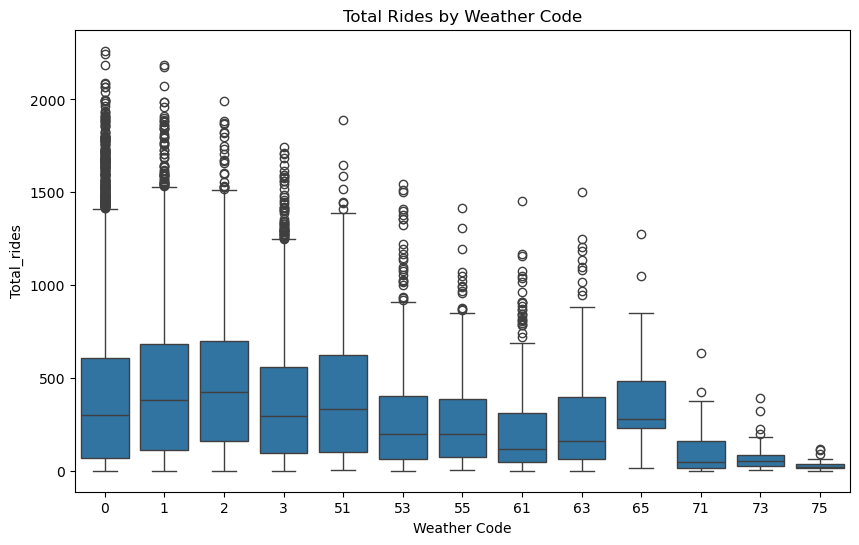

In [66]:
#visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')    
# --- IGNORE ---
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code')  
plt.show()  


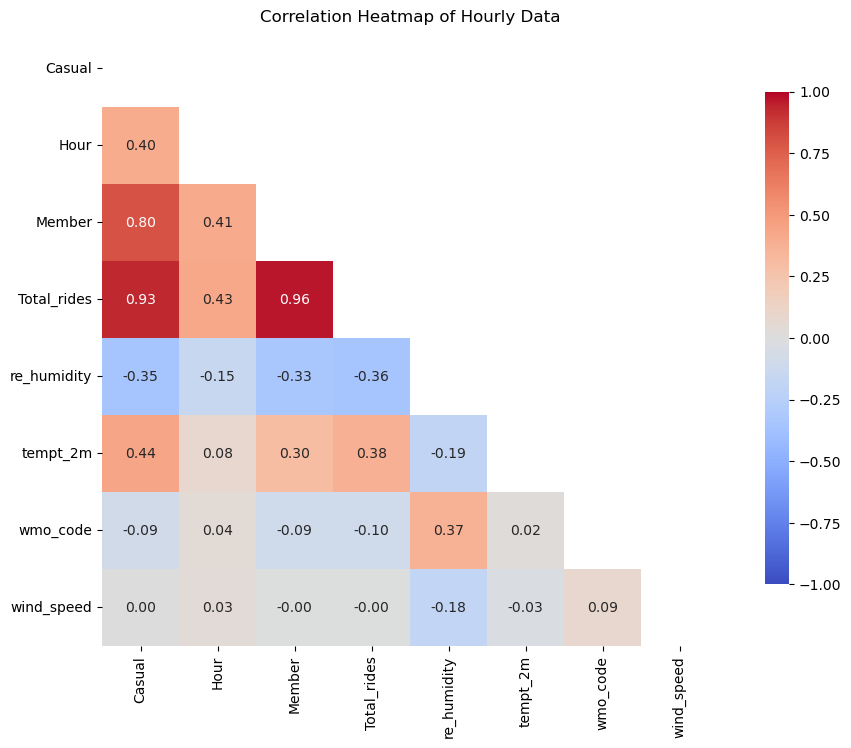

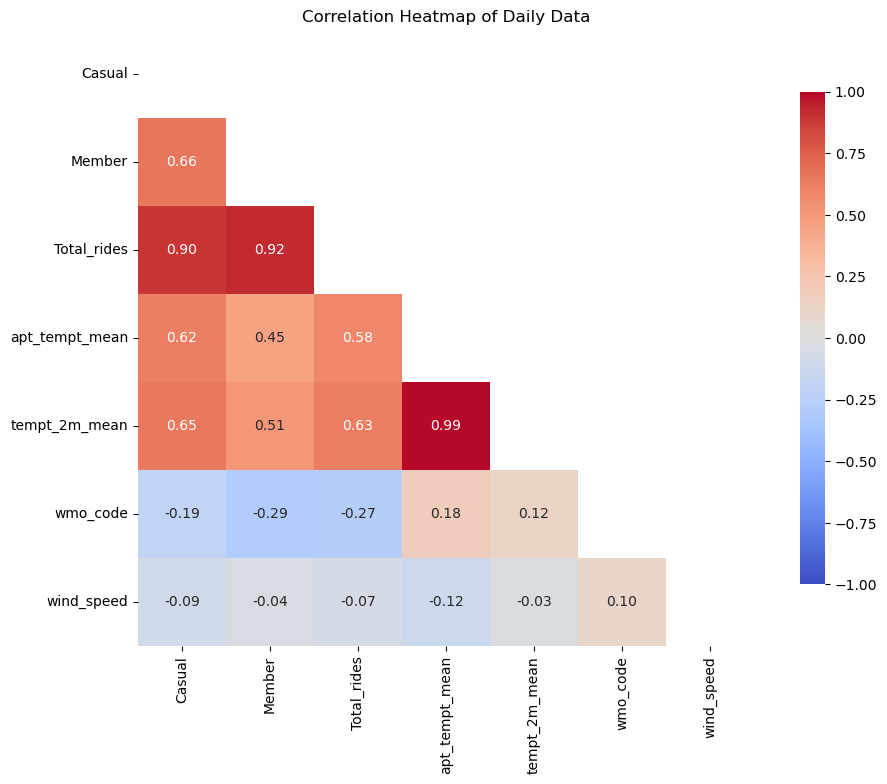

In [ ]:
#visualization using heatmap    
#  Select only numeric columns
numeric_df = df_hr_n.select_dtypes(include=['float64', 'int64'])

#  correlation
corr_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',mask=mask, fmt='.2f',vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Hourly Data')
plt.show()

#visualization using heatmap for df_day
#  Select only numeric columns
numeric_df_day = df_day_n.select_dtypes(include=['float64', 'int64'])   
#  correlation
corr_matrix_day = numeric_df_day.corr()
# heatmap
plt.figure(figsize=(12, 8))
mask_day = np.triu(np.ones_like(corr_matrix_day, dtype=bool))   
sns.heatmap(corr_matrix_day, annot=True, cmap='coolwarm', mask=mask_day, fmt='.2f', vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Daily Data')
plt.show()  

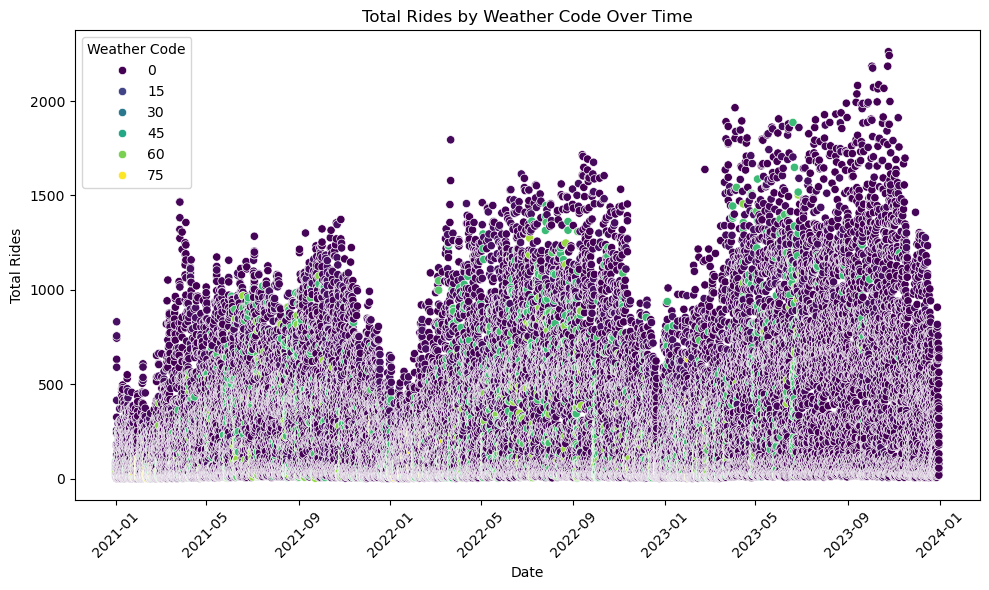

In [76]:
#visualization using scatter plot for df_hr
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hr_n, x='Date', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code Over Time')      
plt.xlabel('Date')
plt.ylabel('Total Rides')   
plt.xticks(rotation=45)
plt.legend(title='Weather Code')
plt.tight_layout()
plt.show()

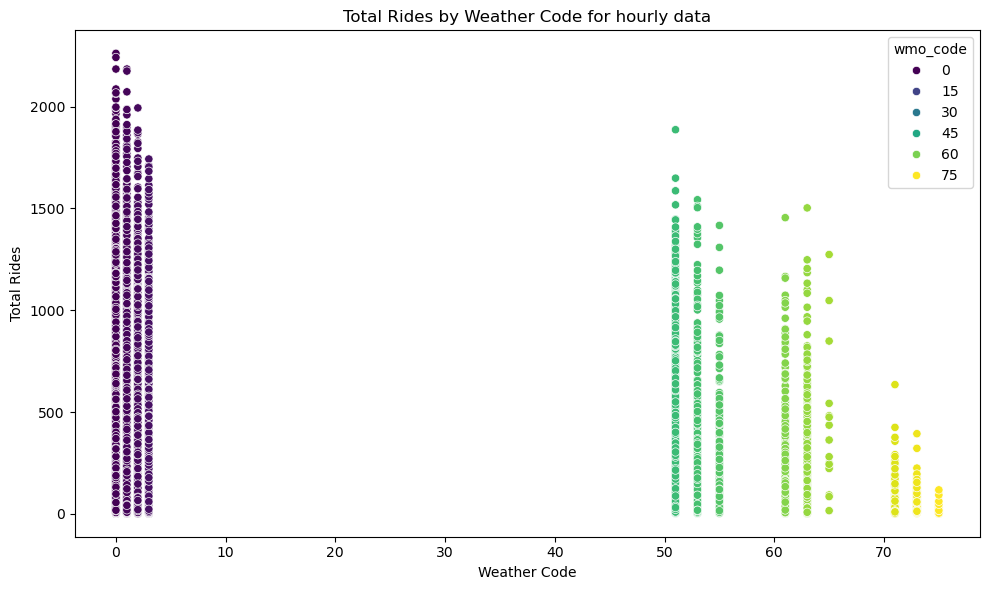

In [78]:
#visualization of relationship between 'Total_rides' and 'wmo_code'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hr_n, x='wmo_code', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code for hourly data')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')   
plt.tight_layout()
plt.show()  

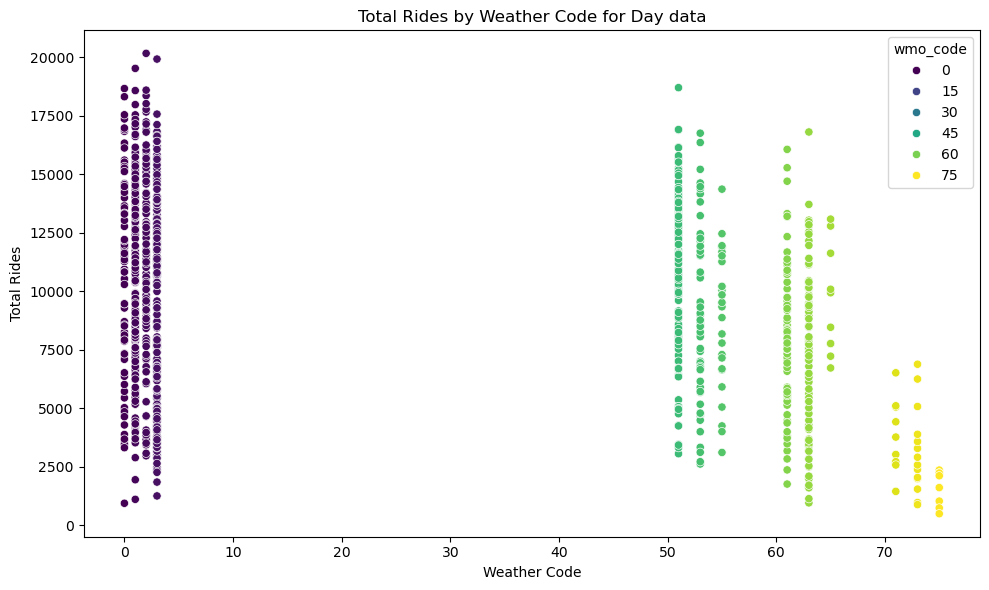

In [79]:
#visualization of relationship between 'Total_rides' and 'wmo_code'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_day_n, x='wmo_code', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code for Day data')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')   
plt.tight_layout()
plt.show()  

In [81]:
df_day_n 


,Casual,Date,Member,Total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01 00:00:00,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-01 00:00:00,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-01 00:00:00,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-01 00:00:00,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-01 00:00:00,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2021-02-15 00:00:00,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2021-02-15 00:00:00,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2021-02-15 00:00:00,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2021-02-15 00:00:00,4497,7594,-7.3,-2.9,1,13.8
